In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#mat = pd.read_csv("data/student-mat.csv")
mat = pd.read_csv("data/student-mat.csv")

# Variables
    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    traveltime - home to school travel time (numeric: 1 - 1 hour)
    studytime - weekly study time (numeric: 1 - 10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)
    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)


In [3]:
mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

Most of the variables are integer and 17 categorical data which is more than enough for EDA.

In [4]:
mat.head().transpose()
# We used transpose to list all columns

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [5]:

#Lets rename the G3 column to Final_grade.
mat = mat.rename(columns={'G3':'Final_grade'})
mat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


Good summary of important variables such as Final_grade, Medu,Fedu and many more.

In [6]:
# Make sure there is not any na in dataset.
mat.isna().sum()/mat.shape[0]

school         0.0
sex            0.0
age            0.0
address        0.0
famsize        0.0
Pstatus        0.0
Medu           0.0
Fedu           0.0
Mjob           0.0
Fjob           0.0
reason         0.0
guardian       0.0
traveltime     0.0
studytime      0.0
failures       0.0
schoolsup      0.0
famsup         0.0
paid           0.0
activities     0.0
nursery        0.0
higher         0.0
internet       0.0
romantic       0.0
famrel         0.0
freetime       0.0
goout          0.0
Dalc           0.0
Walc           0.0
health         0.0
absences       0.0
G1             0.0
G2             0.0
Final_grade    0.0
dtype: float64

In [7]:
features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'Final_grade']
levCols = []
numCols = []
for col in features:
    if mat[col].dtype==object:
        levCols.append(col)
    else:
        numCols.append(col)

<bound method DataFrame.corr of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

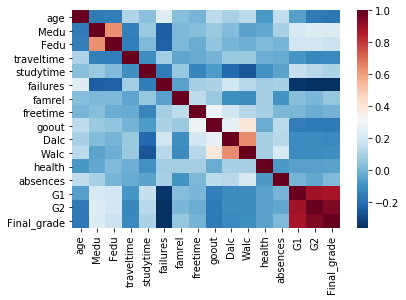

In [11]:
corrmat = mat[numCols].corr('spearman')
sns.heatmap(corrmat,cmap="RdBu_r")
mat.corr

There are lots of columns so lets create a subset of data based on heatmap and our preferences. 

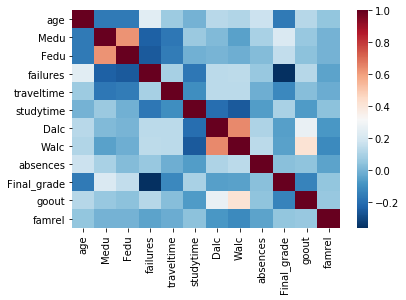

In [12]:
columns = ["age","Medu","Fedu","failures","traveltime","studytime","Dalc","Walc","absences","Final_grade","goout","famrel"]
subset = mat[columns]
s_corr = subset.corr()
sns.heatmap(s_corr,cmap="RdBu_r")

<Figure size 432x288 with 0 Axes>

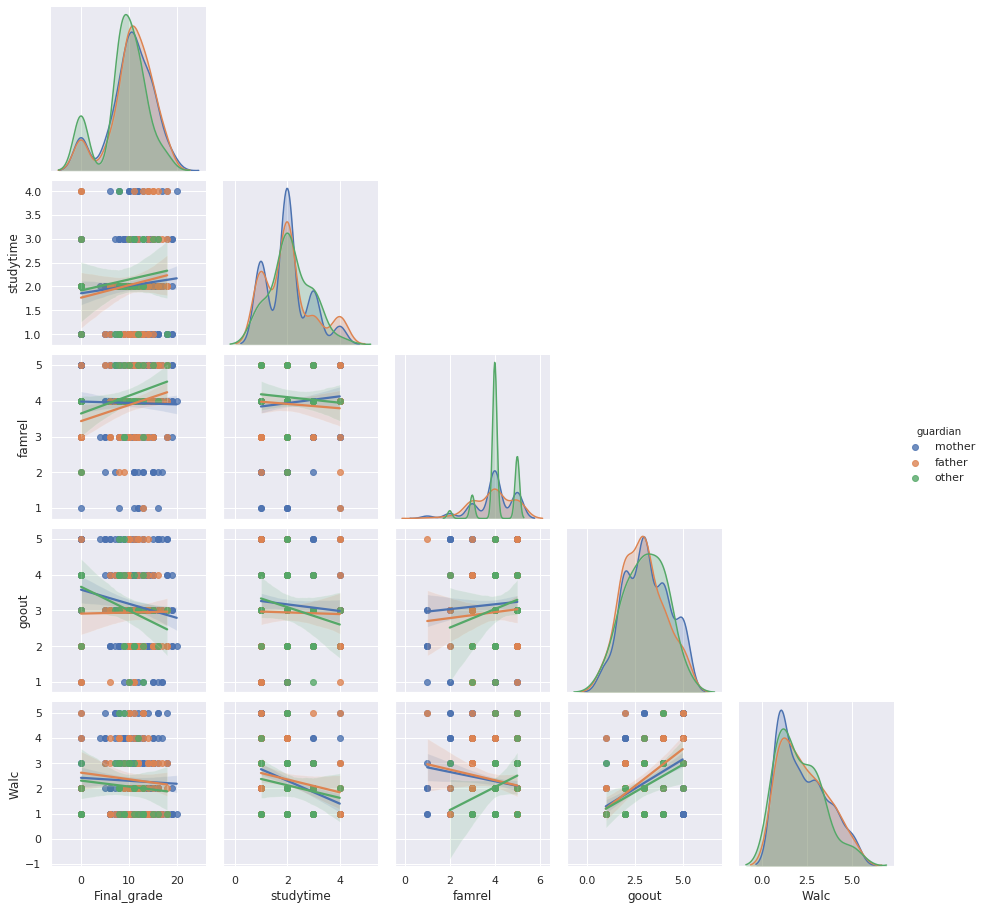

<Figure size 432x288 with 0 Axes>

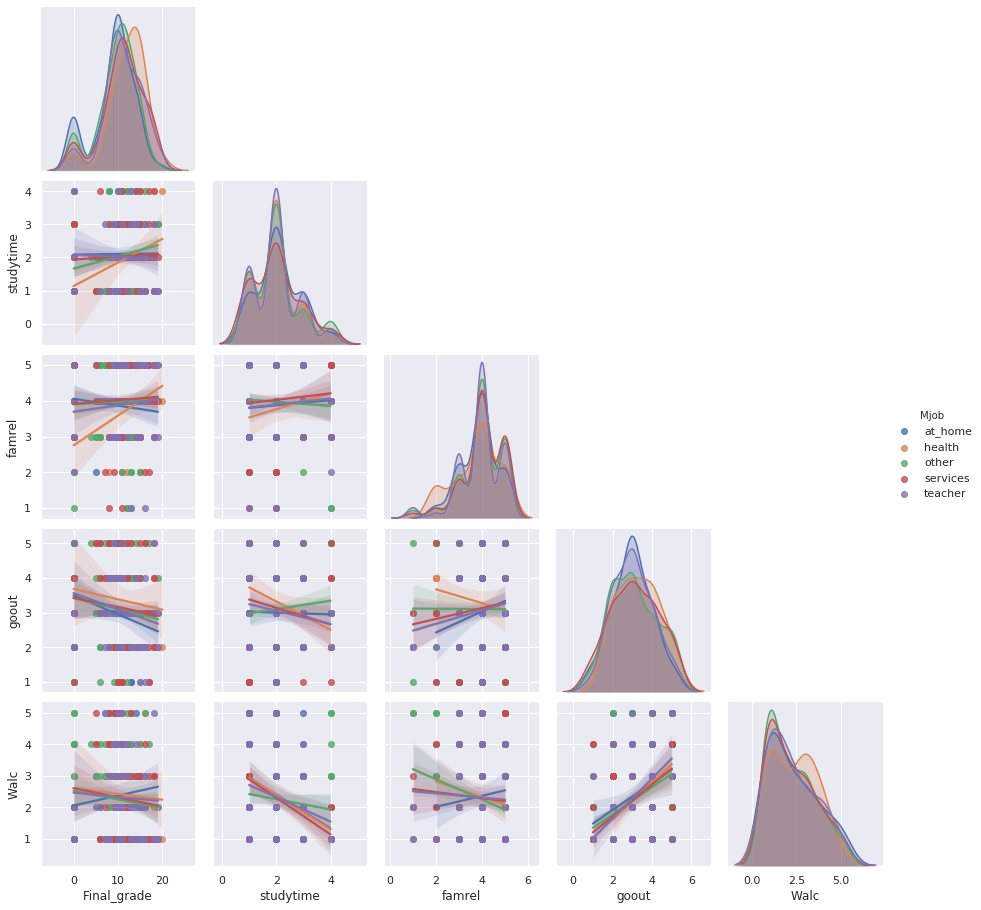

<Figure size 432x288 with 0 Axes>

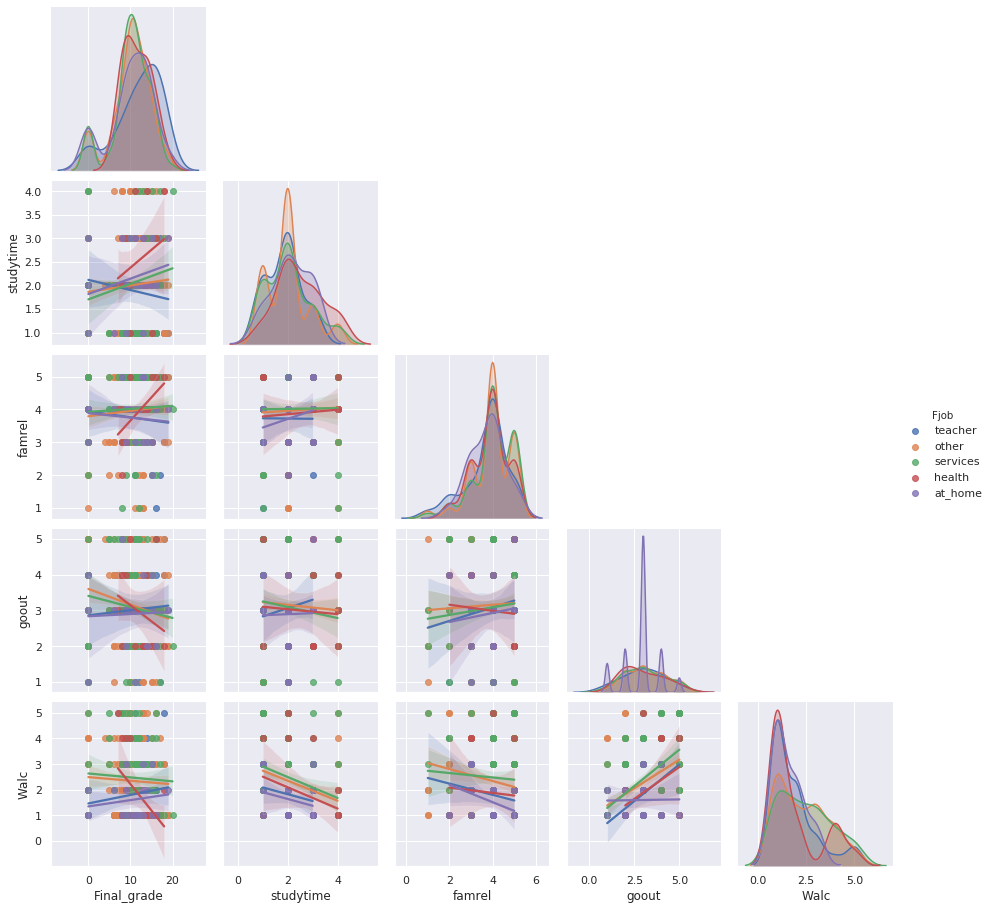

<Figure size 432x288 with 0 Axes>

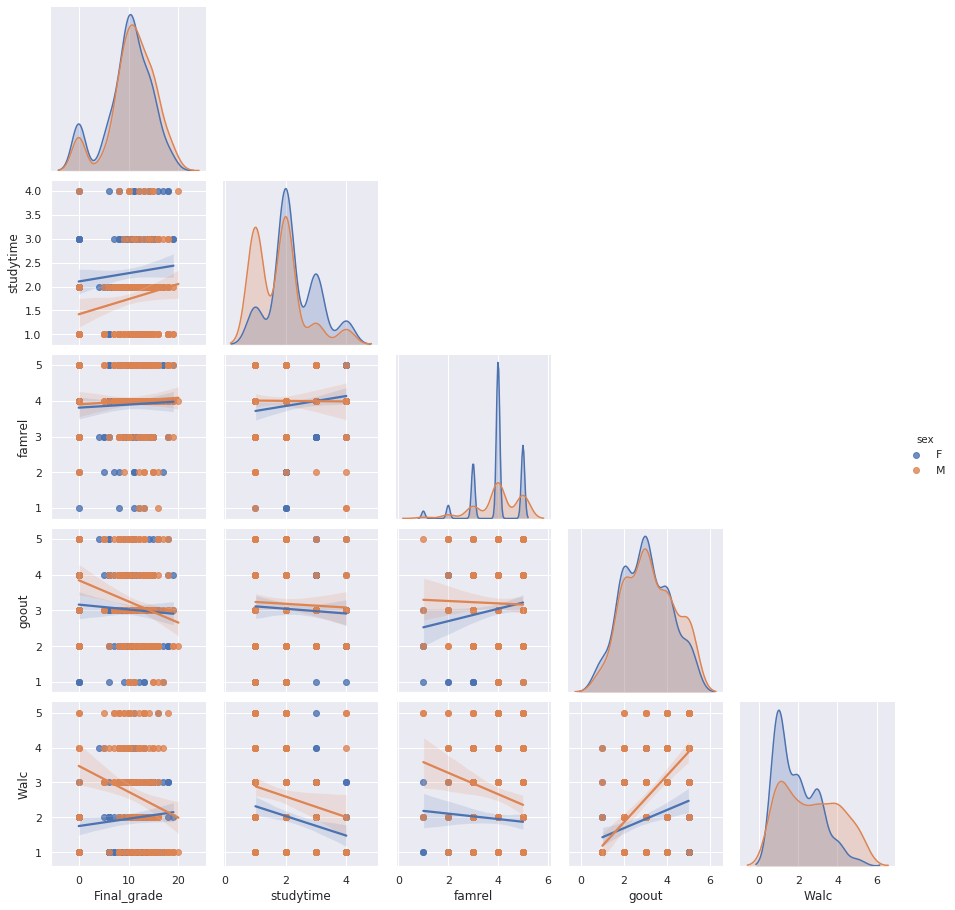

In [13]:
cat_col = ['guardian','Mjob','Fjob','sex']
for col in cat_col :
    sns.set()
    cols = ["Final_grade","studytime","famrel","goout","Walc"]
    plt.figure()
    sns.pairplot(mat[cols + [col]],hue = col,kind= 'reg',corner=True)
    plt.show()

There some interesting infos we can gather from first pairplot
- We can see there is a relationship between studytime and final grade especially if student's guard is different than mother or father.
- when we look at famrel histogram which has interesting value for other, according to it if student's guard is other their relationship is better.
- Lastly we might guess the more students go out the more they consume alchol.
- oddly if student's mother working in healt industry s/he study more, same apply for father as well plus the relationship between student is always better than others.
- as it can seen from last plot, alchol consumption among males student is higher than female.


Text(0.5, 1.0, 'Gender and being romantic affect on Final grade ')

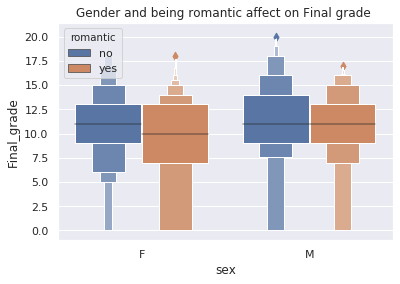

In [14]:
sns.boxenplot(x="sex",y= "Final_grade",data=mat,hue="romantic").set_title("Gender and being romantic affect on Final grade ")

Text(0.5, 1.0, 'Effect of parent status to final grade based on age')

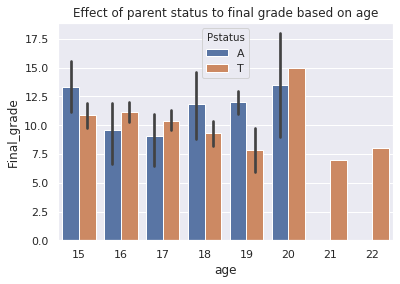

In [15]:
sns.barplot(x = 'age',y = 'Final_grade',hue="Pstatus",data=mat).set_title("Effect of parent status to final grade based on age")

In [16]:
subset.columns

Index(['age', 'Medu', 'Fedu', 'failures', 'traveltime', 'studytime', 'Dalc',
       'Walc', 'absences', 'Final_grade', 'goout', 'famrel'],
      dtype='object')

In [17]:
to_model = mat[['age', 'Medu', 'Fedu', 'failures', 'traveltime', 'studytime', 'Dalc',
       'Walc', 'absences', 'Final_grade', 'goout', 'famrel'] + ['guardian','Mjob','Fjob','sex', 'Pstatus', 'romantic']]
to_model.to_csv('data/to_model.csv')

In [18]:
to_model.head()

,age,Medu,Fedu,failures,traveltime,studytime,Dalc,Walc,absences,Final_grade,goout,famrel,guardian,Mjob,Fjob,sex,Pstatus,romantic
0,18,4,4,0,2,2,1,1,6,6,4,4,mother,at_home,teacher,F,A,no
1,17,1,1,0,1,2,1,1,4,6,3,5,father,at_home,other,F,T,no
2,15,1,1,3,1,2,2,3,10,10,2,4,mother,at_home,other,F,T,no
3,15,4,2,0,1,3,1,1,2,15,2,3,mother,health,services,F,T,yes
4,16,3,3,0,1,2,1,2,4,10,2,4,father,other,other,F,T,no


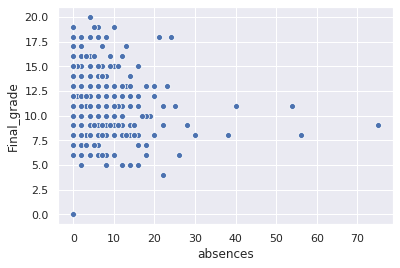

In [19]:
sns.scatterplot(x = 'absences', y = 'Final_grade', data = to_model[['absences', 'Final_grade']])

In [20]:
to_model.dtypes

age             int64
Medu            int64
Fedu            int64
failures        int64
traveltime      int64
studytime       int64
Dalc            int64
Walc            int64
absences        int64
Final_grade     int64
goout           int64
famrel          int64
guardian       object
Mjob           object
Fjob           object
sex            object
Pstatus        object
romantic       object
dtype: object

Almost all variables that can be treated as categorical for plotting, except Final_grade, absences and age

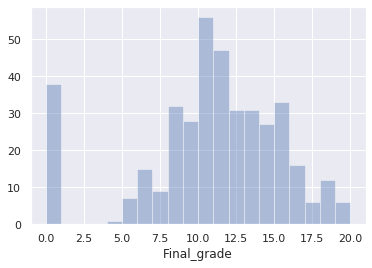

In [21]:
sns.distplot(to_model.Final_grade,kde = False, bins = 20)

In [24]:
to_model.Final_grade.value_counts(normalize=1)

10    0.141772
11    0.118987
0     0.096203
15    0.083544
8     0.081013
13    0.078481
12    0.078481
9     0.070886
14    0.068354
16    0.040506
6     0.037975
18    0.030380
7     0.022785
5     0.017722
17    0.015190
19    0.012658
4     0.002532
20    0.002532
Name: Final_grade, dtype: float64

Text(0.5, 1.0, 'age')

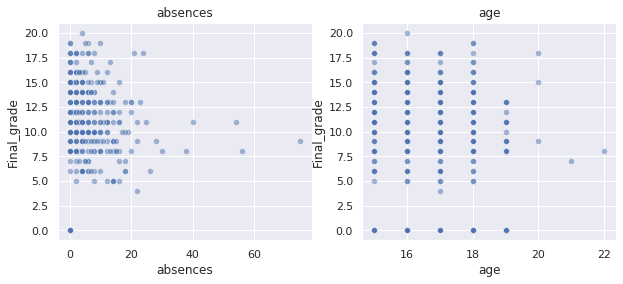

In [22]:
plt.rcParams['figure.figsize'] = [10, 4]
plt.subplot(1,2,1)
sns.scatterplot(x = 'absences', y = 'Final_grade', data = to_model, alpha = 0.5).set_title('absences')
plt.subplot(1,2,2)
sns.scatterplot(x = 'age', y = 'Final_grade', alpha = 0.5, data = to_model).set_title('age')

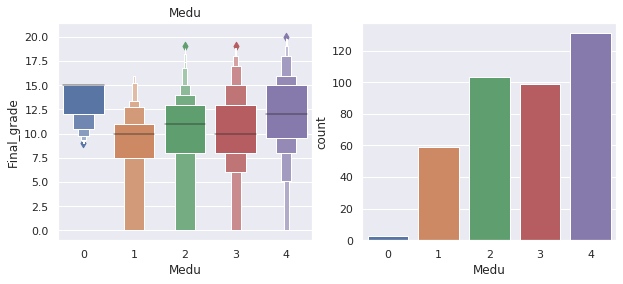

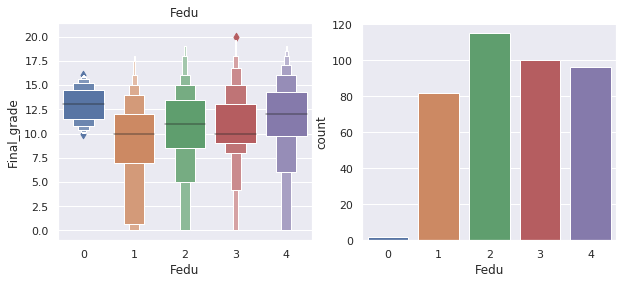

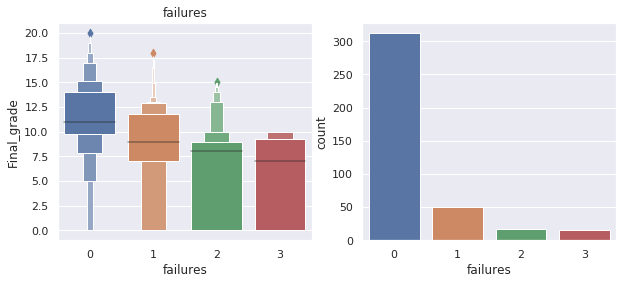

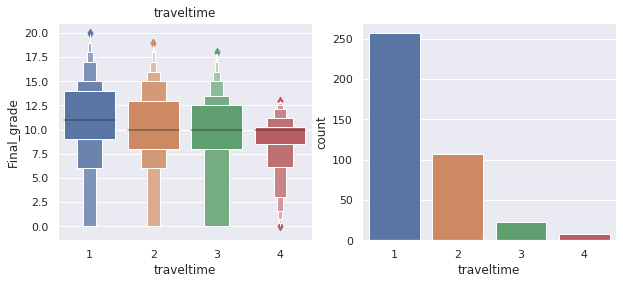

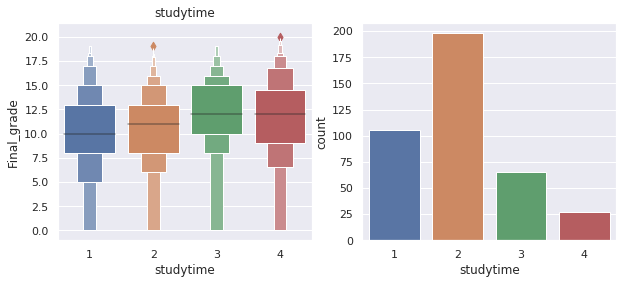

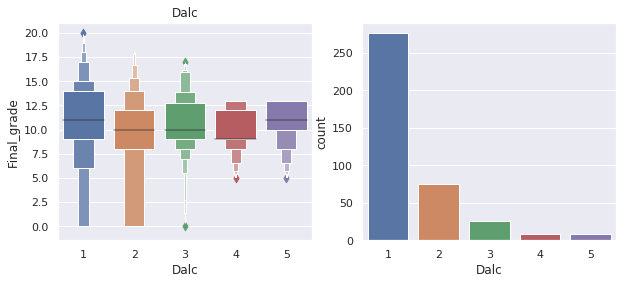

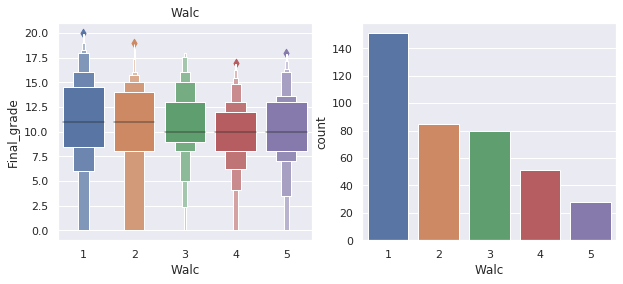

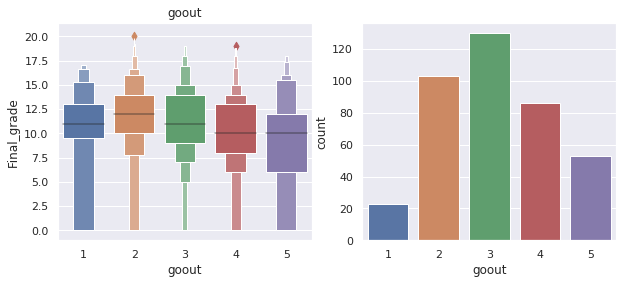

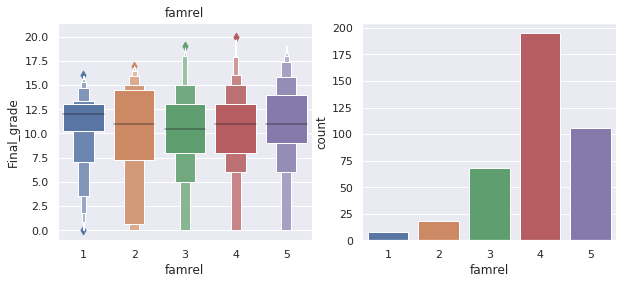

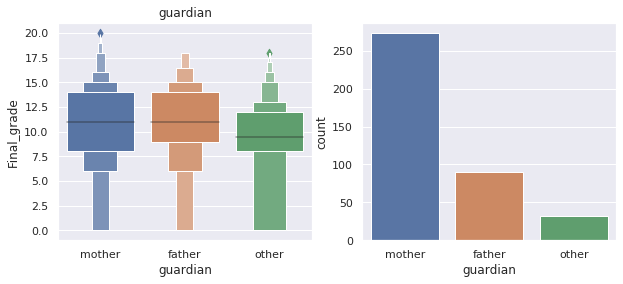

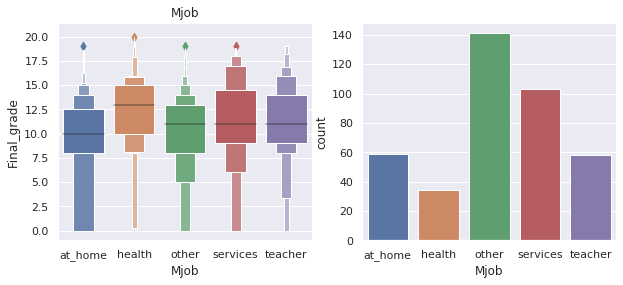

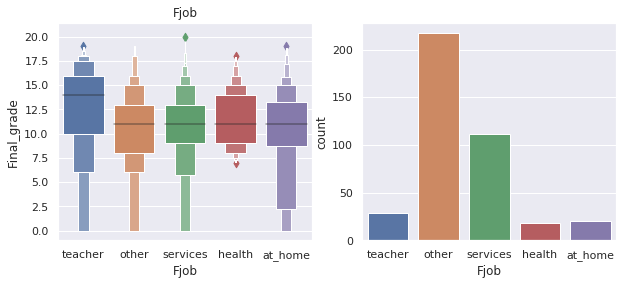

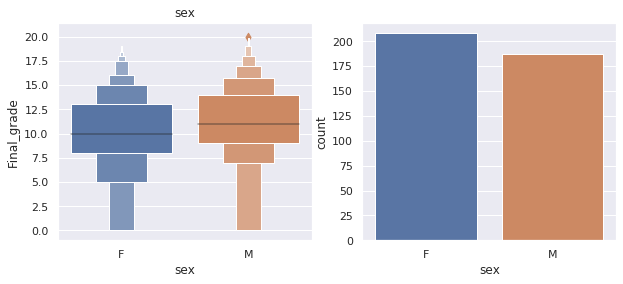

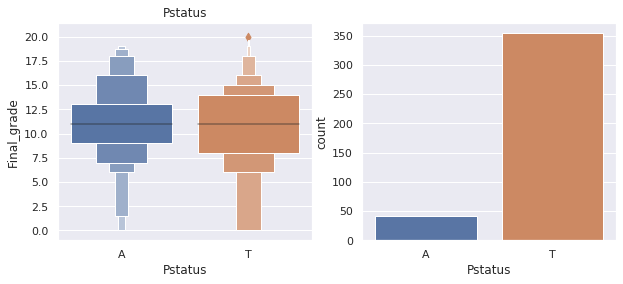

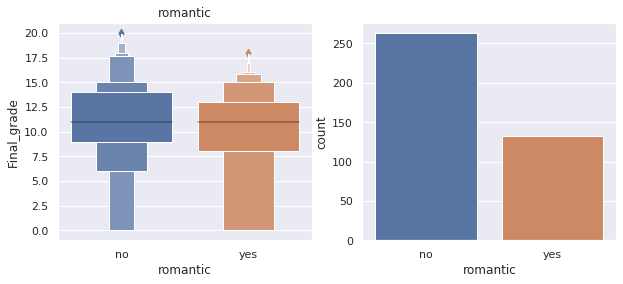

In [23]:
for col in list(to_model.drop(['Final_grade', 'age', 'absences'], axis = 1).columns): 
    plt.figure()
    plt.subplot(1,2,1)
    sns.boxenplot(x=col,y= "Final_grade",data=to_model).set_title(col)
    plt.subplot(1,2,2)
    sns.countplot(x=col, data=to_model)
    plt.show()